# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes               | RM            | Turma |
| :--------------------------------- | :------------- | :-----: |
| Cauê Engelmann                     | RM 331199      | `2IA` |
| Marcelo Gulfier                    | RM 330738      | `2IA` |
| Marcos Massaharu Muto              | RM 330930      | `2IA` |
| Priscila Daniele Fritsch Gonçalves | RM 331893      | `2IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

O dataset original "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

__Atualizado em 16/07/2017__

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
automobile = pd.read_csv("data/automobile-mod.csv", sep=";")
automobile.head(10)


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

In [3]:
auto_correlacao = automobile[["city_mpg", "highway_mpg", "length", "width", "height", "horsepower", "price"]].corr()
auto_correlacao

,city_mpg,highway_mpg,length,width,height,horsepower,price
city_mpg,1.000000,0.875933,-0.633185,-0.620316,-0.069029,-0.763573,-0.657661
highway_mpg,0.875933,1.000000,-0.709308,-0.697742,-0.117146,-0.776634,-0.712812
length,-0.633185,-0.709308,1.000000,0.857170,0.492063,0.577923,0.690628
width,-0.620316,-0.697742,0.857170,1.000000,0.306002,0.613488,0.751265
height,-0.069029,-0.117146,0.492063,0.306002,1.000000,-0.085544,0.135486
horsepower,-0.763573,-0.776634,0.577923,0.613488,-0.085544,1.000000,0.810795
price,-0.657661,-0.712812,0.690628,0.751265,0.135486,0.810795,1.000000


In [4]:
auto_pricey=automobile.sort_values(["price"], ascending=False).head(10)[["make", "price"]]
auto_biggest=automobile.sort_values(["length", "width", "height"], ascending=False).head(10)[["length", "width", "height"]]
auto_powerful=automobile.sort_values(["horsepower"], ascending=False).head(10)[["horsepower"]]
auto_economic=automobile.sort_values(["city_mpg", "highway_mpg"]).head(10)[["city_mpg", "highway_mpg"]]
print("10 com maiores preços")
print(auto_pricey)
print("\n\n10 com maiores dimensões")
print(auto_biggest)
print("\n\n10 com maiores potências")
print(auto_powerful)
print("\n\n10 mais econômicos")
print(auto_economic)


10 com maiores preços
              make  price
71   mercedes-benz  45400
15             bmw  41315
70   mercedes-benz  40960
125        porsche  37028
16             bmw  36880
46          jaguar  36000
45          jaguar  35550
69   mercedes-benz  35056
68   mercedes-benz  34184
124        porsche  34028


10 com maiores dimensões
     length  width  height
70    208.1   71.7    56.7
68    202.6   71.7    56.5
67    202.6   71.7    56.3
44    199.6   69.6    52.8
45    199.6   69.6    52.8
71    199.2   72.0    55.4
106   198.9   68.4    58.7
107   198.9   68.4    58.7
111   198.9   68.4    58.7
110   198.9   68.4    56.7


10 com maiores potências
     horsepower
46          262
125         207
124         207
123         207
102         200
70          184
71          184
16          182
15          182
14          182


10 mais econômicos
     city_mpg  highway_mpg
66        0.0         25.0
181       0.0         34.0
46       13.0         17.0
70       14.0         16.0
71       

In [5]:
auto_pricey_biggest = pd.merge(auto_pricey, auto_biggest, left_index=True, right_index=True)
auto_pricey_powerful = pd.merge(auto_pricey, auto_powerful, left_index=True, right_index=True)
auto_pricey_economic = pd.merge(auto_pricey, auto_economic, left_index=True, right_index=True)
print("Preço X Tamanho")
print(auto_pricey_biggest)
print("")
print("Preço X Força")
print(auto_pricey_powerful)
print("")
print("Preço X Consumo")
print(auto_pricey_economic)

Preço X Tamanho
             make  price  length  width  height
71  mercedes-benz  45400   199.2   72.0    55.4
70  mercedes-benz  40960   208.1   71.7    56.7
45         jaguar  35550   199.6   69.6    52.8
68  mercedes-benz  34184   202.6   71.7    56.5

Preço X Força
              make  price  horsepower
71   mercedes-benz  45400         184
15             bmw  41315         182
70   mercedes-benz  40960         184
125        porsche  37028         207
16             bmw  36880         182
46          jaguar  36000         262
124        porsche  34028         207

Preço X Consumo
             make  price  city_mpg  highway_mpg
71  mercedes-benz  45400      14.0         16.0
70  mercedes-benz  40960      14.0         16.0
16            bmw  36880      15.0         20.0
46         jaguar  36000      13.0         17.0
45         jaguar  35550      15.0         19.0
69  mercedes-benz  35056      16.0         18.0
68  mercedes-benz  34184      16.0         18.0


**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:** No procedimento acima foram listadas as classificações dos 10 carros com maior preço, maior tamanho, maior força e menor consumo. A seguir a tabela de preços foi relacionada com as outras três tabelas resultando nas tabelas ilustradas acima.

Baseado nesse cruzamento, nota-se que há quatro carros em comum entre os 10 maiores preços e os 10 maiores tamanhos. Entre maiores preços e maiores forças há 7 carros em comum, bem como maiores preços e maior consumo (menor eficiência *mpg). 

Para corroborar a observação feita acima, nota-se, pela matriz de correlação, que a relação entre preço e força (horsepower) é de 0.81, indicando uma alta correlação positiva, ou seja, quanto maior a força maior o preço. A correlação entre largura e comprimento e preço varia entre 0.69 e 0.75, sendo razoavelmente alto o índice de correlação. Já a correlação entre milhas por galão e preço varia entre -0.65 e -0.71, indicando um índice de correlação negativo razoavelmente alto, ou seja, quanto menor a eficiência do carro, maior o preço. 

Também nota-se que os carros com índice 70 e 71 aparecem nos três comparativos. 

Portanto, pode-se afirmar que o preço dos automóveis é correlacionado positivamente ao tamanho e força e negativamente em relação à eficiência.

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

In [6]:
#Converte a informação sobre número de portas para um valor numérico 
mapa_str_num = {"one":int(1),"two":int(2),"three":int(3),"four":int(4),"five":int(5),"six":int(6),
                 "seven":int(7),"eight":int(8),"nine":int(9),"ten":int(10),"eleven":int(11),"twelve":int(12)}


automobile["number_of_doors"] = automobile["number_of_doors"].map(mapa_str_num) 
automobile["number_of_cylinders"] = automobile["number_of_cylinders"].map(mapa_str_num)

automobile[["number_of_cylinders","number_of_doors"]].head(10)

,number_of_cylinders,number_of_doors
0,4,2
1,4,2
2,6,2
3,4,4
4,5,4
5,5,2
6,5,4
7,5,4
8,5,4
9,4,2


In [7]:
def normalize(df,colunas):
    df_aux = df.copy()
    for col in colunas:
        df_aux[col] = (df_aux[col] - df_aux[col].mean()) / (df_aux[col].max() - df_aux[col].min())
    return (df_aux) 

cols_numericas = ["number_of_doors","wheel_base","length","width","height",
                      "curb_weight","number_of_cylinders","engine_size",
                      "bore","stroke","compression_ratio","horsepower","peak_rpm",
                      "city_mpg","highway_mpg","price"]

#Normaliza as informações númericas do dataframe de automóveis 
automobile_norm = normalize(automobile,cols_numericas)

automobile_norm[cols_numericas].head(10)

,number_of_doors,wheel_base,length,width,height,curb_weight,number_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,-0.567164,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,-0.036318,0.011790,0.100213,-0.277020,-0.072767,0.036151,-0.009517,-0.080102,-0.065648,0.007146
1,-0.567164,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,-0.036318,0.011790,0.100213,-0.277020,-0.072767,0.036151,-0.009517,-0.080102,-0.065648,0.081745
2,-0.567164,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,0.163682,0.094809,-0.464072,0.099171,-0.072767,0.237086,-0.009517,-0.120918,-0.084167,0.081745
3,0.432836,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.036318,-0.067455,-0.099787,0.065837,-0.010267,-0.005905,0.066240,-0.018878,-0.010093,0.018442
4,0.432836,0.017580,0.035806,0.043671,0.044444,0.104086,0.063682,0.034432,-0.099787,0.065837,-0.135267,0.054843,0.066240,-0.141327,-0.158241,0.105329
5,-0.567164,0.029242,0.046254,0.035124,-0.055556,-0.018878,0.063682,0.034432,-0.099787,0.065837,-0.104017,0.031478,0.066240,-0.120918,-0.102685,0.050714
6,0.432836,0.204169,0.276105,0.471021,0.161111,0.111844,0.063682,0.034432,-0.099787,0.065837,-0.104017,0.031478,0.066240,-0.120918,-0.102685,0.111784
7,0.432836,0.204169,0.276105,0.471021,0.161111,0.154513,0.063682,0.034432,-0.099787,0.065837,-0.104017,0.031478,0.066240,-0.120918,-0.102685,0.141822
8,0.432836,0.204169,0.276105,0.471021,0.177778,0.205715,0.063682,0.015564,-0.142644,0.065837,-0.116517,0.171665,0.066240,-0.161735,-0.195278,0.264830
9,-0.567164,0.070058,0.038791,-0.093082,0.044444,-0.062322,-0.036318,-0.071229,0.121642,-0.219877,-0.085267,-0.010578,0.111695,-0.039286,-0.028611,0.080008


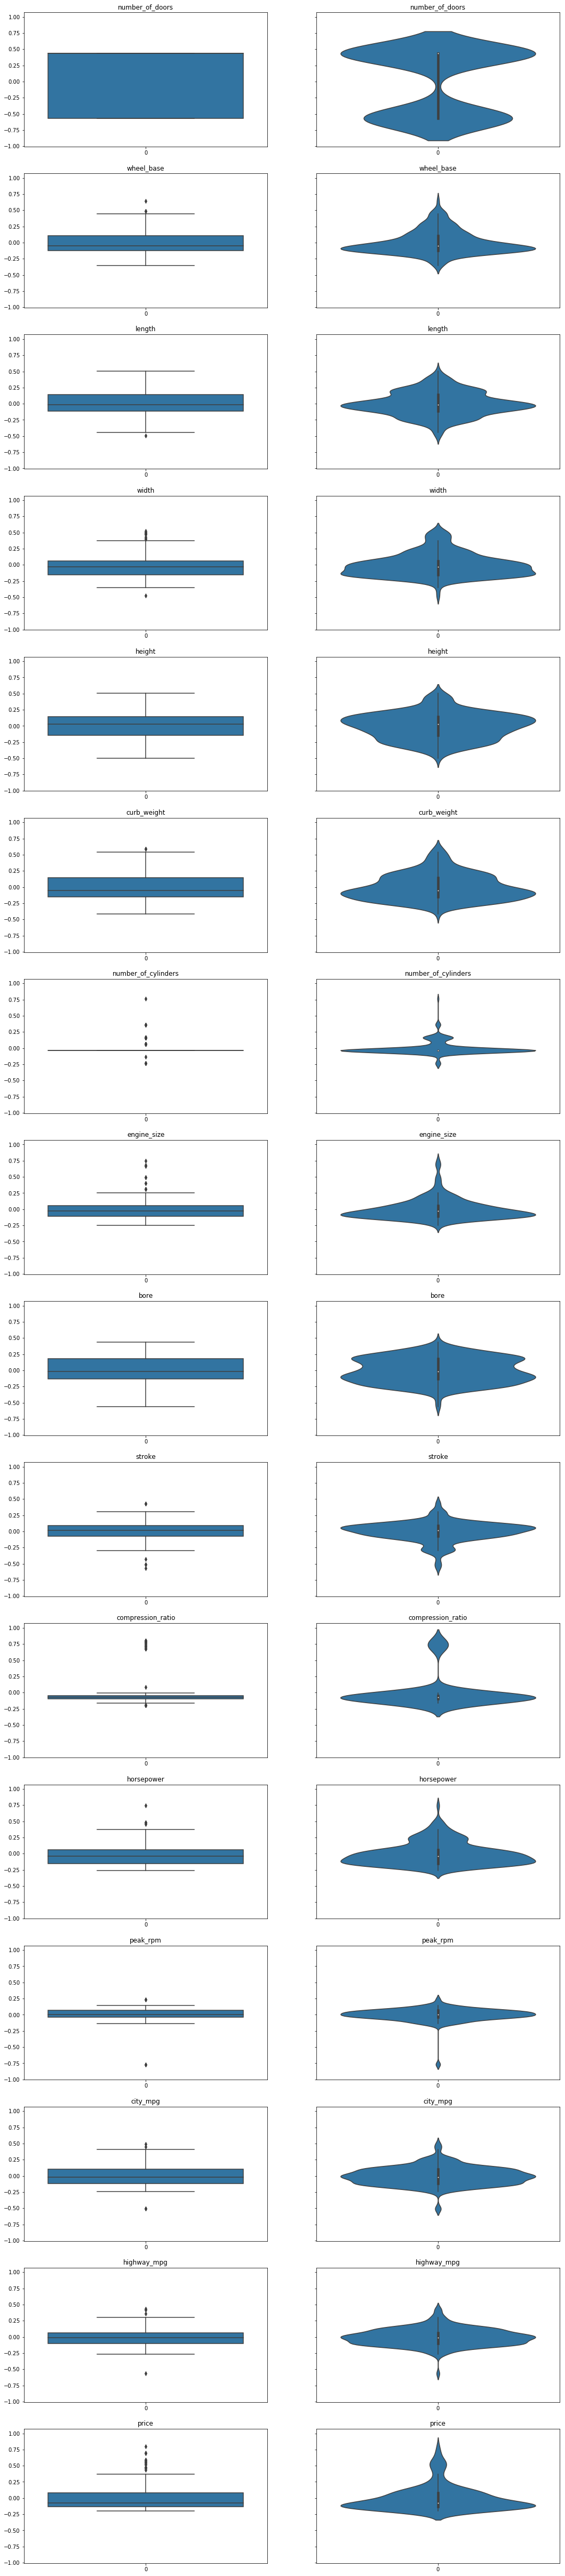

In [8]:
import math 

n_linhas = len(cols_numericas)
fig,ax = plt.subplots(nrows=n_linhas,ncols=2, sharey=True)


fig.set_size_inches(18, 88)
for i in range(n_linhas):    
    sns.boxplot(ax=ax[i,0], data=[automobile_norm[cols_numericas[i]]]).set_title(cols_numericas[i])
    sns.violinplot(ax=ax[i,1], data=[automobile_norm[cols_numericas[i]]]).set_title(cols_numericas[i])    

Podemos verificar visualmente que há candidatos a serem outliers para as seguinte características dos veículos: wheel_base, length, width, curb_weight, number_of_cylinders, engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg e price. 

In [9]:
estat = automobile_norm.describe()
for col in cols_numericas:
    #Intervalo inter-quartil
    iq = (estat[col]["75%"] - estat[col]["25%"])
    #Limite superior para outlier é 1,5 vezes o intervalo interquartílico acima do 75% percentil
    lim_sup = estat[col]["75%"] + 1.5 * iq 
    #Limite inferior para outlier é 1,5 vezes o intervalo interquartílico abaixo do 25% percentil
    lim_inf = estat[col]["25%"] - 1.5 * iq 
    #Seleciona os carros que seguem a regra calculada acima
    vet_out = automobile_norm[(automobile_norm[col] > lim_sup) | (automobile_norm[col] < lim_inf)][[col]]
    #Se algum elemento foi selecionado, imprima
    if (len(vet_out) > 0 ):
       print("Candidatos a outliers para " + col) 
       print(vet_out)
       print("\n\n")

Candidatos a outliers para wheel_base
    wheel_base
67    0.489883
68    0.489883
70    0.644402



Candidatos a outliers para length
      length
17 -0.494045



Candidatos a outliers para width
       width
6   0.471021
7   0.471021
8   0.471021
16  0.428286
17 -0.477697
46  0.402645
67  0.496662
68  0.496662
69  0.394098
70  0.496662
71  0.522303



Candidatos a outliers para curb_weight
    curb_weight
44     0.585855
45     0.585855



Candidatos a outliers para number_of_cylinders
     number_of_cylinders
2               0.163682
4               0.063682
5               0.063682
6               0.063682
7               0.063682
8               0.063682
11              0.163682
12              0.163682
13              0.163682
14              0.163682
15              0.163682
16              0.163682
17             -0.136318
44              0.163682
45              0.163682
46              0.763682
52             -0.236318
53             -0.236318
54             -0.236318
55     

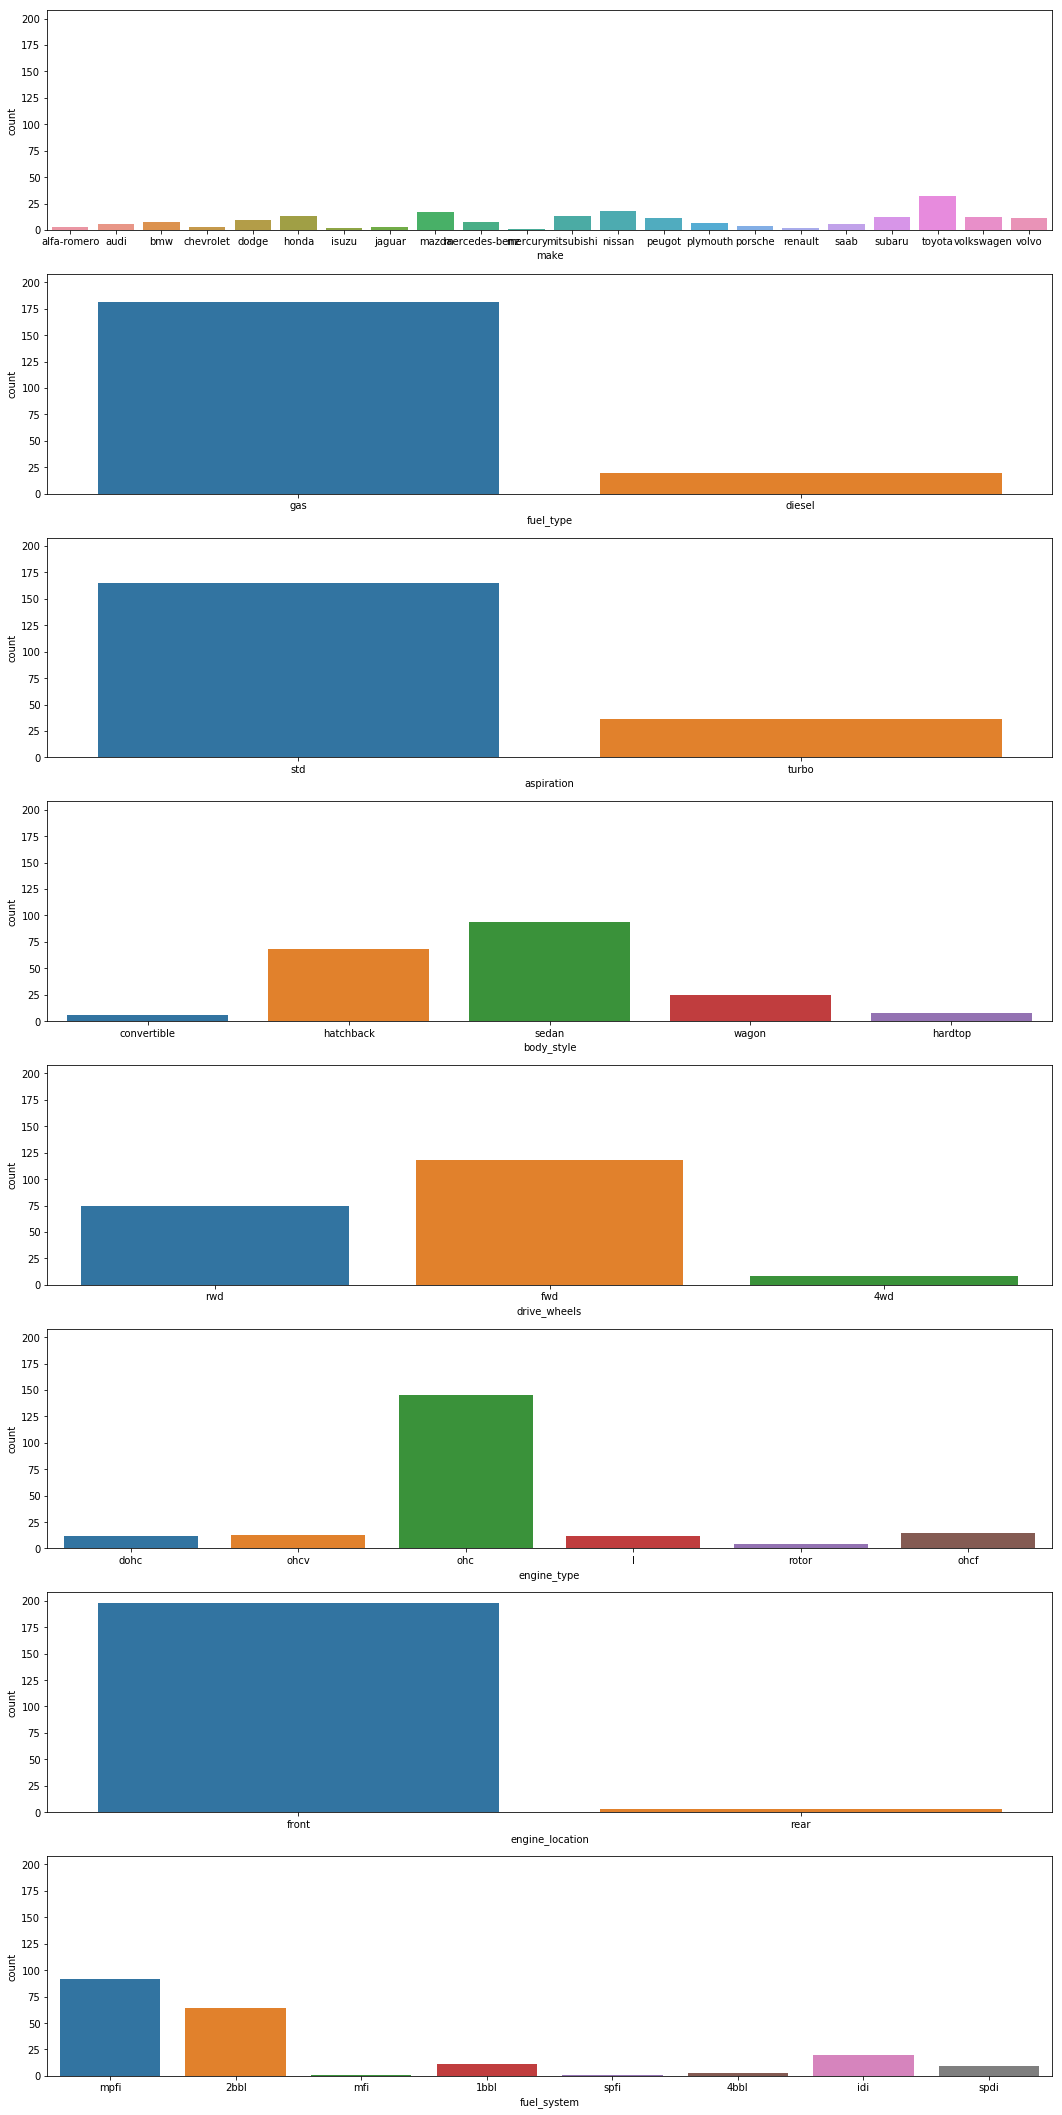

In [10]:
#Análise dos atributos categóricos nominais
cols_alfa = ["make","fuel_type","aspiration","body_style","drive_wheels","engine_type","engine_location","fuel_system"]
n_linhas = len(cols_alfa)
fig,ax = plt.subplots(nrows=n_linhas, sharey=True)
fig.set_size_inches(18, 38)
#Exibe o histograma de quantidades de elementos por categoria para verificar se há alguma informação discrepante
for i in range(n_linhas):
    sns.countplot(ax=ax[i],x=cols_alfa[i],data=automobile_norm)
    

Observando os atributos categóricos sobre veículos, não há valor discrepante que não represente a informação correspondente. Deste modo, os fabricantes de veículos são realmente nomes de fabricantes, o tipo de combustível é coerente com o esperado, e assim sucessivamente. 

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise preliminar pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [11]:
#Verifica se há valores nulos
automobile.isnull().any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

In [12]:
#Automóveis com peak_rpm nulo
automobile[automobile["peak_rpm"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
136,subaru,gas,std,2,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603
184,volkswagen,gas,std,4,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995


In [13]:
#Automóveis com city_mpg nulo
automobile[automobile["city_mpg"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
36,honda,gas,std,2,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895


In [14]:
#Automóveis com highway_mpg nulo
automobile[automobile["highway_mpg"].isnull()]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,2,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529


             highway_mpg  city_mpg
highway_mpg     1.000000  0.875933
city_mpg        0.875933  1.000000


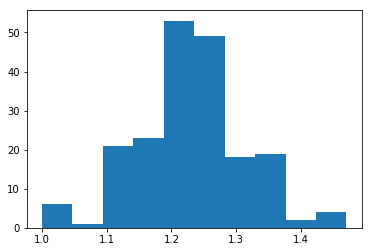

In [15]:
#Verifica-se a correlação entre o consumo na estrada e o consumo na cidade
#e percebe-se que há uma alta correlação entre os atributos 
print(automobile[["highway_mpg", "city_mpg"]].corr())


#Calcula a relação entre o consumo da estrada e o consumo da cidade para quando há os valores ou quando 
#os valores não são zerados 
automobile["relacao_estrada_cidade"] = np.where((automobile["city_mpg"].isnull())  | (automobile["city_mpg"]==0) |
                                                (automobile["highway_mpg"].isnull()) | (automobile["highway_mpg"]==0),
                                                 np.nan,
                                                automobile["highway_mpg"] / automobile["city_mpg"])


#Percebe-se pelo gráfico que a distribuição entre a relacao_estrada_cidade é muito concentrada ao redor da média,
#semelhante a uma distribuição normal 
ax = plt.hist(automobile[automobile["relacao_estrada_cidade"].notnull()]["relacao_estrada_cidade"])



In [16]:
#Verifica-se agora que o peak_rpm não possui uma alta correlação com nenhum outro atributo sobre automóveis
#conforme percebe-se abaixo 
automobile.corr()["peak_rpm"]

number_of_doors          -0.163910
wheel_base               -0.202727
length                   -0.056354
width                    -0.092631
height                   -0.275686
curb_weight              -0.098857
number_of_cylinders      -0.077775
engine_size              -0.104959
bore                     -0.046081
stroke                   -0.065078
compression_ratio        -0.284202
horsepower                0.132510
peak_rpm                  1.000000
city_mpg                 -0.127533
highway_mpg              -0.050670
price                    -0.006104
relacao_estrada_cidade    0.317387
Name: peak_rpm, dtype: float64

Há valores nulos para <b>peak_rpm</b>, <b>city_mpg</b> e <b>highway_mpg</b>. 

Para os valores de city_mpg e highway_mpg, por haver forte correlação entre essas variáveis é possível realizar uma estimativa
de um valor a partir do outro. 

No caso de peak_rpm, não há essa característica percebida.

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

Para o caso das varíaveis <b>city_mpg</b> e <b>highway_mpg</b> a estimativa será numérica estimada em função um do outro atributo, será assumido que há uma proporção média entre essas duas variáveis. 

Para o caso da variável <b>peak_rpm</b> será considerada a substituição simples pela média do valor.

In [17]:
#calcula a média da relação entre o consumo da estrada / consumo da cidade 
media_estrada_cidade = automobile["relacao_estrada_cidade"].mean(skipna=True)
media_estrada_cidade


1.2318479649443899

In [18]:
#Converte o consumo na cidade quando null em função do consumo da estrada 
for i,row in automobile.loc[automobile["city_mpg"].isnull(),:].iterrows():
    automobile.loc[i,"city_mpg"] = automobile.loc[i,"highway_mpg"] / media_estrada_cidade
    

#Converte o consumo na estrada quando null em função do consumo da cidade 
for i,row in automobile.loc[automobile["highway_mpg"].isnull(),:].iterrows():
    automobile.loc[i,"highway_mpg"] = automobile.loc[i,"city_mpg"] * media_estrada_cidade




In [19]:
#Tratamento para os carros com peak_rpm nulo

#Seleciona os carros com peak_rpm que não são nulos e nem tem valor de peak_rpm com valores iguais a zero 
peak_rpm_tratado = automobile[(automobile["peak_rpm"].notnull()) & (automobile["peak_rpm"] > 0)]


#Obtem a média do peak_rpm
peak_rpm_medio = peak_rpm_tratado["peak_rpm"].mean()

for i,row in automobile.loc[automobile["peak_rpm"].isnull(),:].iterrows():
    automobile.loc[i,"peak_rpm"] = peak_rpm_medio



### Análise de valores com valores iguais a 0

Analise se no conjunto de dados se há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [20]:
#Lista as colunas que possuem valores zerados 
for col in cols_numericas: 
    vet_0 = automobile[automobile[col] == 0]
    if (len(vet_0) > 0):
       print("Coluna = " + col + " com valores zerados\n")
       print(automobile[automobile[col] ==0][col])
       print("\n\n")



Coluna = peak_rpm com valores zerados

32    0.0
35    0.0
Name: peak_rpm, dtype: float64



Coluna = city_mpg com valores zerados

66     0.0
181    0.0
Name: city_mpg, dtype: float64



Coluna = highway_mpg com valores zerados

67    0.0
Name: highway_mpg, dtype: float64





A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.


Os mesmos atributos que apresentaram valores nulos também apresentam valores zerados. 

Os atributos citados não deveriam ter valores zerados, pois um veículo com motor não pode ter o número máximo de rotações por minuto (peak_rpm) sendo 0 e nem ter o consumo de combustível nem na estrada e nem na cidade (highway_mpg, city_mpg) como sendo iguais a zero. 

O tratamento sugerido será o mesmo aplicado no caso de valores nulos. 

Para os atributos city_mpg e highway_mpg teremos um cálculo em função do outro e o valor do peak_rpm será substituído pelo valor médio. 


In [21]:
#Converte o consumo na cidade quando zero em função do consumo da estrada 
for i,row in automobile.loc[automobile["city_mpg"]==0,:].iterrows():
    automobile.loc[i,"city_mpg"] = automobile.loc[i,"highway_mpg"] / media_estrada_cidade
    

#Converte o consumo na estrada quando zero em função do consumo da cidade 
for i,row in automobile.loc[automobile["highway_mpg"]==0,:].iterrows():
    automobile.loc[i,"highway_mpg"] = automobile.loc[i,"city_mpg"] * media_estrada_cidade




In [22]:
#Converte o peak_rpm para o valor médio quando o valor é zero
for i,row in automobile.loc[automobile["peak_rpm"]==0,:].iterrows():
    automobile.loc[i,"peak_rpm"] = peak_rpm_medio

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q1 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [23]:
def identificacao_outlier(df, col): 
    print(col)
 
    estat = df.describe()
    #Intervalo inter-quartil
    iq = (estat[col]["75%"] - estat[col]["25%"])
    #Limite superior para outlier é 5 vezes o intervalo interquartílica acima do 75% percentil
    lim_sup = estat[col]["75%"] + 5 * iq 
    #Limite inferior para outlier é 5 vezes o intervalo interquarílica abaixo do 25% percentil
    lim_inf = estat[col]["25%"] - 5 * iq 
    #Seleciona os elementos que seguem a regra calculada acima
    vet_out_sup = df[(df[col] > lim_sup)][[col]]
    vet_out_inf = df[(df[col] < lim_inf)][[col]]
    #Se algum elemento foi selecionado, imprima
    if (len(vet_out_sup) > 0 ):
       print("Candidatos a outliers superiores para " + col) 
       print(vet_out_sup)
       print("\n\n")
    
    if (len(vet_out_inf) > 0 ):
       print("Candidatos a outliers inferiores para " + col) 
       print(vet_out_inf)
       print("\n\n")

    

In [24]:
for col in cols_numericas: 
    identificacao_outlier(automobile,col)

number_of_doors
wheel_base
length
width
height
curb_weight
number_of_cylinders
Candidatos a outliers superiores para number_of_cylinders
     number_of_cylinders
2                      6
4                      5
5                      5
6                      5
7                      5
8                      5
11                     6
12                     6
13                     6
14                     6
15                     6
16                     6
44                     6
45                     6
46                    12
64                     5
65                     5
66                     5
67                     5
68                     8
69                     8
70                     8
71                     8
98                     6
99                     6
100                    6
101                    6
102                    6
103                    6
123                    6
124                    6
125                    6
174                    6
175          

Pelo método utilizado, há potenciais outliers para dois atributos: número de cilindros (<b>number_of_cylinders</b>) e taxa de compressão (<b>compression_ratio</b>). 

Pesquisando na Internet, encontram-se referências em vários sites (revista 4 rodas, jornal do veículo) para motores de veículos cujo número de cilindros variam de 2 a 12, sendo que a maioria dos veículos possuem 4 (vide estatística abaixo). Deste modo, não faz sentido excluir este veículos pois os números parecem passíveis de serem reais 



In [25]:
automobile.groupby(["number_of_cylinders"])["number_of_cylinders"].count()

number_of_cylinders
2       4
3       1
4     157
5      10
6      24
8       4
12      1
Name: number_of_cylinders, dtype: int64

No caso do atributo de taxa de compressão, percebemos que todos os elementos selecionados possuem motores a diesel, e segundo a wikipedia (https://pt.wikipedia.org/wiki/Motor_a_diesel), motores a diesel tem a taxa de compressão variando de 15 a 25, ou seja, os dados parecem verossímeis. 



In [26]:
automobile[automobile["compression_ratio"]>=21.0][["fuel_type","compression_ratio"]]

,fuel_type,compression_ratio
60,diesel,22.7
63,diesel,22.0
64,diesel,21.5
65,diesel,21.5
66,diesel,21.5
67,diesel,21.5
87,diesel,21.9
105,diesel,21.0
107,diesel,21.0
109,diesel,21.0


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:**
Sim. Pela metodologia sugerida foram localizados dados discrepantes. Contudo os dados devem ser mantidos, pois há uma enorme variedade no número de cilindros dos veículos, compatível com aquilo observado na amostra e a taxa de compressão de veículos é muito mais alta naqueles com motores à diesel, também condizentes com o identificado na amostra

### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [27]:
def mapear_serie(serie):
    dict_gen = {}
    valores = serie.unique()
    ordinal = 0 
    for valor in valores:
        ordinal += 1
        dict_gen[valor] = ordinal 
            
    return (dict_gen)

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [28]:
#Converte todas as colunas alfanuméricas para os seus valores ordinais
for col in cols_alfa:
    mapa_ordinal = mapear_serie(automobile[col])
    automobile[col] = automobile[col].map(mapa_ordinal)


Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diesel", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [29]:
#Colunas marcadas como alfanuméricas agora já estão convertidas
automobile[cols_alfa]



,make,fuel_type,aspiration,body_style,drive_wheels,engine_type,engine_location,fuel_system
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,2,1,2,1,1
3,2,1,1,3,2,3,1,1
4,2,1,1,3,3,3,1,1
5,2,1,1,3,2,3,1,1
6,2,1,1,3,2,3,1,1
7,2,1,1,4,2,3,1,1
8,2,1,2,3,2,3,1,1
9,3,1,1,3,1,3,1,1


In [30]:
#Se existe a coluna auxiliar incluída para o tratamento de dados faltantes então a exclui
if "relacao_estrada_cidade" in list(automobile.columns.values):
   automobile = automobile.drop("relacao_estrada_cidade",1)


In [31]:
def is_numeric_array(array):
    numerical_dtype_kinds = {'b', # boolean
                             'u', # unsigned integer
                             'i', # signed integer
                             'f', # floats
                             'c'} # complex
    try:
        return array.dtype.kind in numerical_dtype_kinds
    except AttributeError:
        # in case it's not a numpy array it will probably have no dtype.
        return np.asarray(array).dtype.kind in numerical_dtype_kinds

In [32]:
#Verifica se todos os atributos dos automóveis são numéricos
print(is_numeric_array(automobile))

True


Nesse ponto, temos a garantia que todas as colunas do dataframe <b>automobile</b> são numéricas. Pode-se prosseguir para a utilização de modelos de aprendizagem de máquina para realizar os treinamentos, testes e predições. 


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:** 

* **Regressão Linear** 

Modelo que estima o valor desejado, traçando a melhor linha reta baseada na distribuição das observações. Os coeficientes dessa linha são calculados pelos valores que minimizam a soma residual do médoto dos mínimos quadrados entre as observações e a estimativa. O resíduo consiste em subtrair o valor observado com o valor estimado e elevar ao quadrado. Assim, a regressão linear busca coeficientes que ao serem utilizados para calcular o valor estimado produzem o menor resíduo para cada observação.

Caso de uso: Estimar o tempo de percurso de bicicleta entre estações de locação da cidade de Los Angeles, utilizando o dataset [“Los Angeles Metro Bike Share Trip Data”](https://www.kaggle.com/cityofLA/los-angeles-metro-bike-share-trip-data) do Kaggle. A regressão pode ser realizada utilizando o ID das estações de início e fim do percurso e o horário de início da viagem.


* **Regressão por Árvore de Decisão** 

Modelo que estima o valor desejado utilizando regras de decisão inferidas pelos atributos. As regras podem estar no formato “if-then-else”. Para cada decisão tomada, uma nova regra pode ser aplicada aumentando a profundidade da árvore de decisão. Quanto mais profunda a árvore, maior a acurácia do modelo, porém o risco da ocorrência de overfitting é aumentado.

Caso de uso: Utilizando o dataset [“Kickstarter Projects”](https://www.kaggle.com/kemical/kickstarter-projects) do Kaggle, estimar a chance de sucesso de um projeto. Utilizando os nós: categoria, categoria principal, período de arrecadação e valor pleiteado, a árvore de decisão pode combinar os nós de modo a apresentar o melhor resultado.


* **Regressão Ridge** 

Dependendo da quantidade de atributos e da correlação entre eles, o método dos mínimos quadrados, utilizado na regressão linear, pode ocasionar overfitting ou até falhar em encontrar coeficientes únicos, pois pode atribuir pesos grandes a atributos que poderiam ser removidos do modelo caso sejam correlacionados a outros atributos. A regressão Ridge corrige essas falhas, adionando um parâmetro à soma residual do método dos mínimos quadrados, isso regulariza o modelo, penalizando coeficientes grandes, e, por consequência, encolhendo os coeficientes da regressão.

Caso de uso: Utilizando o dataset [“Breast Cancer Wisconsin Data”](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) do Kaggle, estimar o tipo de câncer de mama (maligno ou benigno) baseando-se em todos os atributos do dataset. Nesse caso, os atributos perímetro e área são calculados pelo atributo raio, ou seja, são correlacionados, dessa forma, utilizando a regressão de Ridge evitamos overfitting


Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previamente não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

In [33]:
# Para a predição do preço dos automóveis, vamos utilizar os atributos com maiores correlação com relação ao atributo procurado
print(automobile.corr()["price"].sort_values(ascending=False).round(2)*100)

# Os atributos são: drive_wheels, wheel_base, length, width, curb_weight, number_of_cylinders, engine_size, bore, horsepower,
# city_mpg e highway_mpg
feature_col_names = ['drive_wheels','wheel_base','length','width','curb_weight','number_of_cylinders','engine_size','bore','horsepower','city_mpg','highway_mpg']

price                  100.0
engine_size             87.0
curb_weight             83.0
horsepower              81.0
width                   75.0
number_of_cylinders     71.0
length                  69.0
wheel_base              58.0
bore                    54.0
engine_location         33.0
aspiration              18.0
body_style              18.0
height                  14.0
fuel_type               11.0
stroke                   8.0
compression_ratio        7.0
number_of_doors          5.0
peak_rpm               -10.0
fuel_system            -12.0
engine_type            -14.0
make                   -16.0
drive_wheels           -59.0
city_mpg               -69.0
highway_mpg            -70.0
Name: price, dtype: float64


Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [34]:
from sklearn.model_selection import train_test_split

# armazena os atributos preditores
X = automobile[feature_col_names].values
# armazena os valores a estimar
y = automobile['price'].values

# define que 30% do data set será utilizado para teste e 70% treinamento
split_test_size = 0.30

# gera randomicamente os data sets de treinamento e teste, utilizando como seed o numero 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [35]:
#Inspeção de X_train
print("Atributos de treinamento: ")
print(X_train[0:6])

# array com arrays de 11 valores, a mesma quantidade de atributos escolhida

Atributos de treinamento: 
[[2.000e+00 9.720e+01 1.734e+02 6.520e+01 2.302e+03 4.000e+00 1.200e+02
  3.330e+00 9.700e+01 2.700e+01 3.400e+01]
 [2.000e+00 9.370e+01 1.500e+02 6.400e+01 1.837e+03 4.000e+00 7.900e+01
  2.910e+00 6.000e+01 3.800e+01 4.200e+01]
 [1.000e+00 1.012e+02 1.768e+02 6.480e+01 2.765e+03 6.000e+00 1.640e+02
  3.310e+00 1.210e+02 2.100e+01 2.800e+01]
 [2.000e+00 9.650e+01 1.571e+02 6.390e+01 2.024e+03 4.000e+00 9.200e+01
  2.920e+00 7.600e+01 3.000e+01 3.400e+01]
 [2.000e+00 9.370e+01 1.673e+02 6.380e+01 2.191e+03 4.000e+00 9.800e+01
  2.970e+00 6.800e+01 3.100e+01 3.800e+01]
 [1.000e+00 9.430e+01 1.707e+02 6.180e+01 2.337e+03 4.000e+00 1.110e+02
  3.310e+00 7.800e+01 2.400e+01 2.900e+01]]


In [36]:
#Inspeção de y_train
print("Atributo procurado: ")
print(y_train[0:6])

Atributo procurado: 
[ 9549  5399 21105  7295  7609  6785]


Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divida o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [37]:
#IMPLEMENTAÇÃO
print("Relação dos dados de treinamento com o conjunto total: %.2f" % (len(X_train) / automobile['price'].size) )
print("Relação dos dados de teste com o conjunto total: %.2f" % (len(X_test) / automobile['price'].size) )

Relação dos dados de treinamento com o conjunto total: 0.70
Relação dos dados de teste com o conjunto total: 0.30


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [39]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression(normalize=True)
lr_model.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [40]:
print("Pontuação R2 para os dados de treinamento:")
pontuacao(lr_model, X_train, y_train)
print("\n")
print("Pontuação R2 para os dados de test:")
pontuacao(lr_model, X_test, y_test)

Pontuação R2 para os dados de treinamento:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True) R2 score: 0.84


Pontuação R2 para os dados de test:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True) R2 score: 0.77


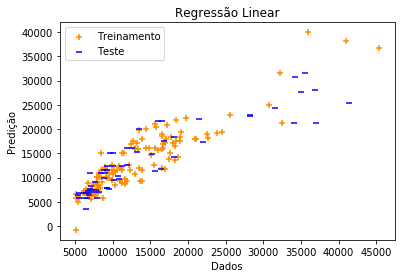

In [41]:
# Plot the results
plt.figure()
plt.scatter(y_train, lr_model.predict(X_train), edgecolor="black",c="darkorange", label="Treinamento",marker="+")
plt.scatter(y_test, lr_model.predict(X_test), edgecolor="black",c="blue", label="Teste",marker="_")
plt.xlabel("Dados")
plt.ylabel("Predição")
plt.title("Regressão Linear")
plt.legend()
plt.show()

### Regressão de árvore de Decisão

In [42]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor(random_state=6).fit(X_train, y_train.ravel())

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [43]:
print("Pontuação R2 para os dados de treinamento:")
pontuacao(dtr_model, X_train, y_train)
print("\n")
print("Pontuação R2 para os dados de test:")
pontuacao(dtr_model, X_test, y_test)

Pontuação R2 para os dados de treinamento:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=6, splitter='best') R2 score: 1.00


Pontuação R2 para os dados de test:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=6, splitter='best') R2 score: 0.92


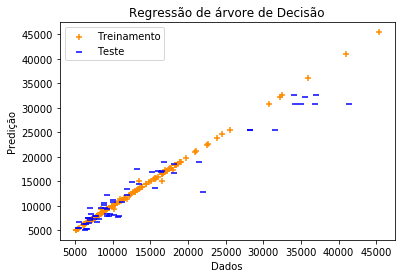

In [44]:
# Plot the results
plt.figure()
plt.scatter(y_train, dtr_model.predict(X_train), edgecolor="black",c="darkorange", label="Treinamento",marker="+")
plt.scatter(y_test, dtr_model.predict(X_test), edgecolor="black",c="blue", label="Teste",marker="_")
plt.xlabel("Dados")
plt.ylabel("Predição")
plt.title("Regressão de árvore de Decisão")
plt.legend()
plt.show()

### Regressão Ridge

In [45]:
from sklearn import linear_model

lrr_model = linear_model.Ridge(alpha=0.1).fit(X_train, y_train.ravel())

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [46]:
print("Pontuação R2 para os dados de treinamento:")
pontuacao(lrr_model, X_train, y_train)
print("\n")
print("Pontuação R2 para os dados de test:")
pontuacao(lrr_model, X_test, y_test)

Pontuação R2 para os dados de treinamento:
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.84


Pontuação R2 para os dados de test:
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.77


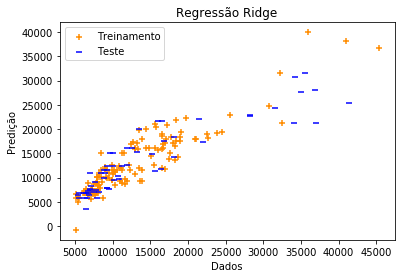

In [47]:
# Plot the results
plt.figure()
plt.scatter(y_train, lrr_model.predict(X_train), edgecolor="black",c="darkorange", label="Treinamento",marker="+")
plt.scatter(y_test, lrr_model.predict(X_test), edgecolor="black",c="blue", label="Teste",marker="_")
plt.xlabel("Dados")
plt.ylabel("Predição")
plt.title("Regressão Ridge")
plt.legend()
plt.show()

**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** Os algoritmos de Regressão Linear e Regressão Ridge chegaram aos exatos mesmos resultados, mesmo para a base de testes. Já a Regressão por Árvore de Decisão apesar de apresentar caracteristicas de overfitting, obteve o melhor resultado dos três, tanto nos dados de treino e quanto nos de teste.
Como a Regressão Linear e a Regressão Ridge possuem semelhanças ao utilizar coeficientes regressores afins de diminuir a complexidade do modelo, ambas procuram suavizar pesos e eliminar atributos muito correlacionados, assim dado que na base de treino escolhida, 8/11 variaveis tem mais de 50% de correlação enquando 3/11 tem mais de 50% correlação negativa, ambos algoritmos possivelmente foram prejudicados na seleção.
No caso do algoritmo de Regressão por Árvore de Decisão, como ele estima o valor desejado utilizando regras de decisão inferidas pelos atributos, a caracteristica de alta correlação das variaveis da base de treino levaram a uma melhor performance pela árvore.

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [48]:
from sklearn.model_selection import GridSearchCV

print(lr_model.get_params())
parameters = {'fit_intercept': [True, False],
              'normalize': [True, False]}

opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(X_train, y_train.ravel())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino.

In [49]:
opt_model_lr.score(X_train, y_train.ravel()).round(2)*100, opt_model_lr.best_estimator_

(84.0,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

E também para os dados de testes.

In [50]:
opt_model_lr.score(X_test, y_test.ravel()).round(2)*100, opt_model_lr.best_estimator_

(77.0,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [51]:
print(dtr_model.get_params())
parameters = {'max_depth': np.arange(1,10),
              'max_features': np.arange(1, X_train.shape[1]+1),
              'min_samples_split': np.arange(0.1, 1, 0.1)}

opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.ravel())

{'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 6, 'splitter': 'best'}


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=6, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [52]:
opt_model_dtr.score(X_train, y_train.ravel()).round(2)*100, opt_model_dtr.best_estimator_

(92.0, DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=8,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=6, splitter='best'))

Pontuação dos dados de teste.

In [53]:
opt_model_dtr.score(X_test, y_test.ravel()).round(2)*100, opt_model_dtr.best_estimator_

(93.0, DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=8,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=6, splitter='best'))

### Regulação do Modelo de Regressão Ridge

In [54]:
print(lrr_model.get_params())
parameters = {'normalize': [True, False],
              'fit_intercept': [True, False],
              'alpha': np.array([1,0.1,0.01,0.001,0.0001,0])}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.ravel())

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'fit_intercept': [True, False], 'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [55]:
opt_model_lrr.score(X_train, y_train.ravel()).round(2)*100, opt_model_lrr.best_estimator_

(84.0, Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=True, random_state=None, solver='auto', tol=0.001))

Pontuação dos dados de teste.

In [56]:
opt_model_lrr.score(X_test, y_test.ravel()).round(2)*100, opt_model_lrr.best_estimator_

(77.0, Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=True, random_state=None, solver='auto', tol=0.001))

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|           | Regressão linear | Regressão árvore de decisão | Regressão ridge |
| ----------| -----------------| ----------------------------| ----------------|
| R2 treino |      84%         |             92%             |       84%       |
| R2 teste  |      77%         |             93%             |       77%       |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** O algoritmo de regressão que obteve o melhor resultado foi a Árvore de Decisão com uma acuracidade de 93% no subset de teste. Nesta etapa apesar da regulação dos modelos, os algoritmos de Regressão Linear e Regressão Ridge mantiveram suas pontuações R2, indicando que dada a base de treino altamente correlacionada, alcançaram sua melhor performance. Para o algoritmo de Regressão por Árvore de Decisão com a regularização do overfitting houve melhora na sua performance com a base de teste.

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [57]:
from sklearn.tree import DecisionTreeRegressor

dtr_model_tunned = DecisionTreeRegressor(random_state=6, max_depth=8, max_features=8, min_samples_split=0.1).fit(X_train, y_train.ravel())

### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [58]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names

feature_col_names

['drive_wheels',
 'wheel_base',
 'length',
 'width',
 'curb_weight',
 'number_of_cylinders',
 'engine_size',
 'bore',
 'horsepower',
 'city_mpg',
 'highway_mpg']

In [59]:
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

test_example_1 = [[1,  95, 150, 62, 2000, 4,  90, 3.0,  50, 37, 44]]
test_example_2 = [[1, 100, 180, 66, 2500, 4, 120, 3.5, 120, 26, 30]]
test_example_3 = [[2, 110, 200, 70, 3600, 6, 200, 3.7, 200, 15, 18]]

predicted_price1 = dtr_model_tunned.predict(test_example_1)
print("O preço previsto do valor de venda do exemplo 1 é: %.2f" %(predicted_price1))

predicted_price2 = dtr_model_tunned.predict(test_example_2)
print("O preço previsto do valor de venda do exemplo 2 é: %.2f" %(predicted_price2))

predicted_price3 = dtr_model_tunned.predict(test_example_3)
print("O preço previsto do valor de venda do exemplo 3 é: %.2f" %(predicted_price3))

O preço previsto do valor de venda do exemplo 1 é: 5955.00
O preço previsto do valor de venda do exemplo 2 é: 10737.50
O preço previsto do valor de venda do exemplo 3 é: 34778.57


## Conclusões finais

Este projeto apresentou de forma simplificada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:** Sim. O modelo final com o algoritmo escolhido (árvore de regressão) apresentou uma boa acuracidade no dataset de teste (93%) e conseguiu prever de forma satisfatória o preço dos 3 exemplos criados, sendo que pelo fato da acuracidade dos datasets de treinamento e de teste terem sido próximas é possível concluir que o modelo consegue generealizar (não está com overfitting) e ser aplicado para os novos dados que ele receba.

Acreditamos que a aplicação de um modelo em conjunto (emsemble) iria produzir um resultado mais satisfatório. No caso, seria o uso do algoritmo de Random Forest, o qual é composto de várias árvores de decisão atuando em conjunto e provavelmente apresentaria melhor acurácia.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**: Esses algoritmos de regressão de aprendizado de máquina podem ser aplicados em diversas áreas do conhecimento, haja visto que a previsão de valores numéricos com base em dados passados é uma característica para a maioria das indústrias.
Alguns exemplos de áreas de aplicações são:
Mercado de ações - previsão dos valores de ativos;
Mercado imobiliário - previsão dos valores dos imóveis.